

---



# IMPORTS



---



In [123]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



---


# Arranging the Data


---

Attributes:

'X', 'T', 'S', 'Y', 'M', 'P', 'K', 'Notes'

*   X: Number of tunes.
*   T: The title of composition.
*   S: The author / reference.
*   Y: Rest of the upper staff.
*   M: Time signature of melody.
*   P: A section of the Melody
*   K: The key of melody.
*   Notes: The notes in particular section.


---



In [108]:
data_dict = {'T': [], 'X': [], 'Y': [], 'S': [], 'Melodies': []}


with open('/content/ABC_DATA.txt') as f:

    lines = f.readlines()

    melody = {'M':[], 'P':[], 'K': [], 'Notes': []}
    data_melody = False
    is_notes = False
    notes = ''

    for line in lines:

      if line[0] == 'X':
        i = int(line.split(':')[1])
        diff = i - len(data_dict['Y'])
        data_dict['Y'].extend([None] * diff)
        data_dict['X'].append(int(line.split(':')[1].rstrip()))
        data_melody = False
        is_notes = False
        data_dict['Melodies'].append(melody)
        melody = {'M':[], 'P':[], 'K': [], 'Notes': []}

      elif line[0] == '%':
        continue

      elif line[0] == 'M' or data_melody:
        data_melody = True

        try:
          key, val = line.split(':')
          if key in melody:
            is_notes = False
            if notes != '':
              melody['Notes'].append(notes.rstrip())
            melody[key].append(val.rstrip())
          else:
            is_notes = True
            notes += line
        except:
          is_notes = True
          notes += line
      
      else:
        key, val = line.split(':')
        if key in data_dict:
          data_dict[key].append(val.rstrip())
          

In [109]:
for k in data_dict:
    print(k, str(len(data_dict[k])))

T 340
X 340
Y 340
S 340
Melodies 340




---


# Creating Pandas DataFrame



---



In [110]:
columns = ['X', 'T', 'S', 'Y', 'M', 'P', 'K', 'Notes', 'n_M', 'n_P', 'n_K', 'n_Notes']
x_list, t_list, s_list, y_list = data_dict['X'], data_dict['T'], data_dict['S'], data_dict['Y']
m_list, p_list, k_list, notes_list = [], [], [], []
n_M_list, n_P_list, n_K_list, n_Notes_list = [], [], [], []

for dic in data_dict['Melodies'][1:]:
  for key, value in dic.items():
    if key == 'M':
      m_list.append(value)
      n_M_list.append(len(value))
    if key == 'P':
      p_list.append(value)
      n_P_list.append(len(value))
    if key == 'K':
      k_list.append(value)
      n_K_list.append(len(value))
    if key == 'Notes':
      notes_list.append(value)
      n_Notes_list.append(len(value))

feature_list = [x_list[:-1], t_list[:-1], s_list[:-1], y_list[:-1], m_list, p_list, k_list, notes_list, n_M_list, n_P_list, n_K_list, n_Notes_list]

In [111]:
for x in feature_list:
  print(len(x))

339
339
339
339
339
339
339
339
339
339
339
339


In [112]:
data = pd.DataFrame(feature_list, index=columns).T

In [113]:
data.head()

,X,T,S,Y,M,P,K,Notes,n_M,n_P,n_K,n_Notes
0,1,A and D,EF,None,"[4/4, 6/8]","[A, B]","[A, D]","[f|""A""ecc c2f|""A""ecc c2f|""A""ecc c2f|""Bm""BcB ""E...",2,2,2,2
1,2,Abacus,"By Hugh Barwell, via Phil Rowe",AB,[6/8],[],[G],"[f|""A""ecc c2f|""A""ecc c2f|""A""ecc c2f|""Bm""BcB ""E...",1,0,1,2
2,3,The American Dwarf,"FTB, via EF",None,[6/8],[],[D],"[f|""A""ecc c2f|""A""ecc c2f|""A""ecc c2f|""Bm""BcB ""E...",1,0,1,2
3,4,Ap Shenkin,"FTB 1 p 46, via EF",None,"[4/4, 6/8]","[A, B, C]",[G],"[f|""A""ecc c2f|""A""ecc c2f|""A""ecc c2f|""Bm""BcB ""E...",2,3,1,6
4,5,Armstrongs,"Kevin Briggs, via EF",AABABAC,[6/8],"[A, B]",[A],"[f|""A""ecc c2f|""A""ecc c2f|""A""ecc c2f|""Bm""BcB ""E...",1,2,1,4


In [122]:
data.to_csv('Generated_CSV', index=False)



---


# Getting Insights



---



In [121]:
data.dtypes

X          object
T          object
S          object
Y          object
M          object
P          object
K          object
Notes      object
n_M        object
n_P        object
n_K        object
n_Notes    object
dtype: object

In [114]:
display(data.dtypes.value_counts())

object    12
dtype: int64

In [115]:
data.describe(include='all')

,X,T,S,Y,M,P,K,Notes,n_M,n_P,n_K,n_Notes
count,339,339,339,133,339,339,339,339,339,339,339,339
unique,339,330,122,19,4,9,30,339,4,6,6,9
top,339,Goat on the Hill,"Trad, arr Phil Rowe",AB,[6/8],[],[D],"[f|""A""ecc c2f|""A""ecc c2f|""A""ecc c2f|""Bm""BcB ""E...",1,0,1,2
freq,1,2,86,85,327,205,104,1,327,205,316,193


In [116]:
num_vars = data.columns[data.dtypes != 'object']
cat_vars = data.columns[data.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index([], dtype='object')
Index(['X', 'T', 'S', 'Y', 'M', 'P', 'K', 'Notes', 'n_M', 'n_P', 'n_K',
       'n_Notes'],
      dtype='object')


In [117]:
data[cat_vars].isnull()

,X,T,S,Y,M,P,K,Notes,n_M,n_P,n_K,n_Notes
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
334,False,False,False,True,False,False,False,False,False,False,False,False
335,False,False,False,True,False,False,False,False,False,False,False,False
336,False,False,False,True,False,False,False,False,False,False,False,False
337,False,False,False,True,False,False,False,False,False,False,False,False


In [118]:
data[cat_vars].isnull().sum().sort_values(ascending=False)

Y          206
n_Notes      0
n_K          0
n_P          0
n_M          0
Notes        0
K            0
P            0
M            0
S            0
T            0
X            0
dtype: int64



---
# Visualizing Data



---




<BarContainer object of 339 artists>

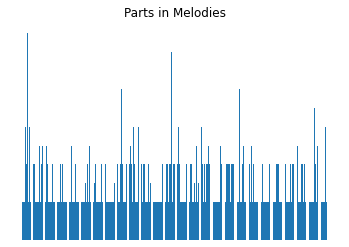

In [135]:
plt.title('Parts in Melodies')
plt.axis('off')
plt.bar(data['T'], data['n_Notes'])

<BarContainer object of 339 artists>

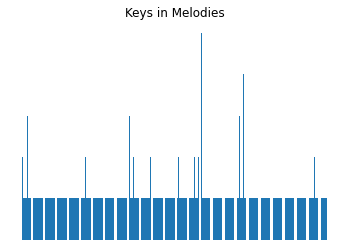

In [136]:
plt.title('Keys in Melodies')
plt.axis('off')
plt.bar(data['T'], data['n_K'])

<BarContainer object of 339 artists>

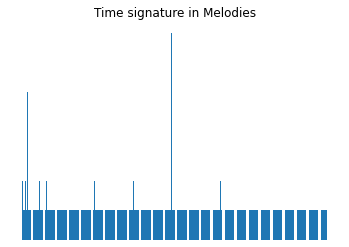

In [137]:
plt.title('Time signature in Melodies')
plt.axis('off')
plt.bar(data['T'], data['n_M'])